# Bayesian Linear Regression

This lab is focused on Bayesian linear regression.  Our goal is to estimate a function $f(x) : \mathbb{R}\rightarrow\mathbb{R}$ given $N$ observations $\{(x_1,f(x_1)),\ldots, (x_N,f(x_N))\}$.

Assume an approximation $\tilde{f}(x)$ of the form
$$
\tilde{f}(x) = \sum_{p=0}^P m_p x^p.
$$
The regression problem is to characterize the coefficients $m=[m_0,\ldots,m_P]$, which we will do in a Bayesian setting.

### Goals:
By the end of this lab, you will be able to
- Derive the posterior distribution for linear-Gaussian problems.
- Characterize prior and posterior predictive distributions.

### Formulation:

Let $y$ denote the "observable" random variable denoting the models outputs and let $\bar{y}$ be a vector in $\mathbb{R}^N$ denoting the specific observations $f(x_1), \ldots, f(x_N)$.  Our goal is to characterize the distribution of $m$ given $y=\bar{y}$.  Bayes' rule gives
$$
p(m | y=\bar{y}) \propto p(y=\bar{y} | m) p(m).
$$
The two major components of this density are the prior density over the coefficeints $p(m)$ and the likelihood function $p(y|m)$.  The prior represents should contain any information we might have before obtaining the observation $\bar{y}$.  The likelihood function $p(y | m)$ defines a statistical model for the data.

For the prior distribution, we choose a Gaussian prior with a large variance.  In particular, 
$$
p(m) = N(0,\sigma_m^2 I),
$$ 
with $\sigma_m^2 = 100$.

> **Question:** Do you think this is a valid prior?  What if we knew $\frac{df}{dx}>0$?  What would change?


To form the likelihood function, we need to relate the expansion coefficients $m$ with the observable random variable $y$. To do this, consider the Vandermonde matrix 
$$
V = \left[\begin{array}{cccc}1 & x_1 & \ldots & x_1^P\\ \vdots & \vdots & & \vdots \\ 1 & x_N & \ldots & x_N^P \end{array}\right].
$$
Using $V$, a common choice is to assume $y$ is given by
$$
y = Vm + \epsilon,
$$
where $\epsilon \sim N(0,\Sigma_y)$ is a zero mean random variable with covariance $\Sigma_y$.  The additive error $\epsilon$ is often called the observation noise.  Here, we will further assume that $\Sigma_y = \sigma_y^2 I$.

> **Question:** Is this a reasonable model of $y$?  What if the noise was multiplicative?

With this additive error, the likelihood function takes the form
$$
p(y | m) = N(Vm, \Sigma).
$$

### Useful Identities
Let $\theta$ denote an arbitrary Gaussian random variable with mean $\mu_\theta$ and covariance $\Sigma_\theta$,
$$
\theta \sim N\left(\mu_\theta, \Sigma_\theta\right).
$$
Then, for a matrix $A$, 
$$
A\theta \sim N\left(A\mu_\theta,\, A\Sigma_\theta A^T\right)
$$
Let $\eta = A\theta + e$, where $e\sim N(0,\Sigma_e)$, then the posterior $p(\theta | \eta)$ is given by
$$
p(\theta | \eta=\bar{\eta}) = N\left(\hat{\mu}, \hat{\Sigma}\right),
$$
where 
$$
\hat{\mu} = \mu_\theta + \Sigma_\theta A^T\left(A\Sigma_\theta A^T + \Sigma_e\right)^{-1}\left(\bar{\eta} - A\mu_\theta\right)
$$
and
$$
\hat{\Sigma} = \Sigma_\theta - \Sigma_\theta A^T\left(A\Sigma_\theta A^T + \Sigma_e\right)^{-1}A\Sigma_\theta
$$

[These notes](https://cs.nyu.edu/~roweis/notes/gaussid.pdf) by Sam Roweis also provide some useful identities.

### Useful software references
- [Numpy Quickstart](https://docs.scipy.org/doc/numpy/user/quickstart.html)
- [Numpy dot function](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.dot.html)
- [Numpy Dense Linear Solve](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.solve.html)

## Imports

In [1]:
import sys
sys.path.insert(0,'/home/fenics/Installations/MUQ_INSTALL/lib')

import numpy as np
import matplotlib.pyplot as plt

from PlotUtilities import PlotGaussianPDF


## Generate Synthetic Observations

In [2]:
def TrueFunc(x):
    return np.sin(4.5*x)

In [3]:
numObs = 20
trueNoiseStd = 2e-2
obsLocs = np.linspace(0,1,numObs)

obsData = TrueFunc(obsLocs) + trueNoiseStd*np.random.randn(numObs)

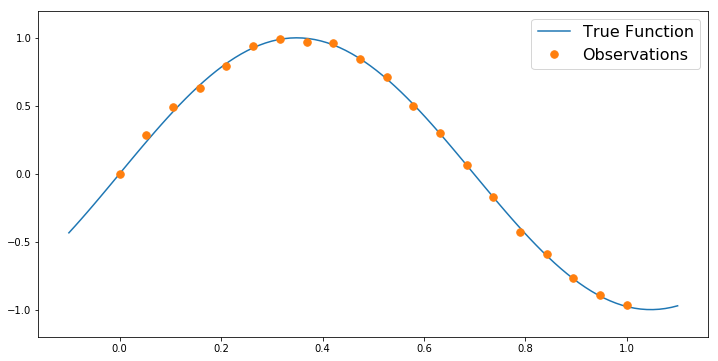

In [4]:
numPlot = 100

plotx = np.linspace(-0.1, 1.1, numPlot)

plt.figure(figsize=(12,6))
plt.plot(plotx, TrueFunc(plotx),label='True Function')
plt.plot(obsLocs,obsData,'.', markersize=15, label = 'Observations')

plt.ylim([-1.2,1.2])
plt.legend(fontsize=16)
plt.show()

## Form the prior

In [5]:
polyOrder = 4

priorMean = np.zeros(polyOrder+1)
priorCov = (10*10)*np.eye(polyOrder+1)

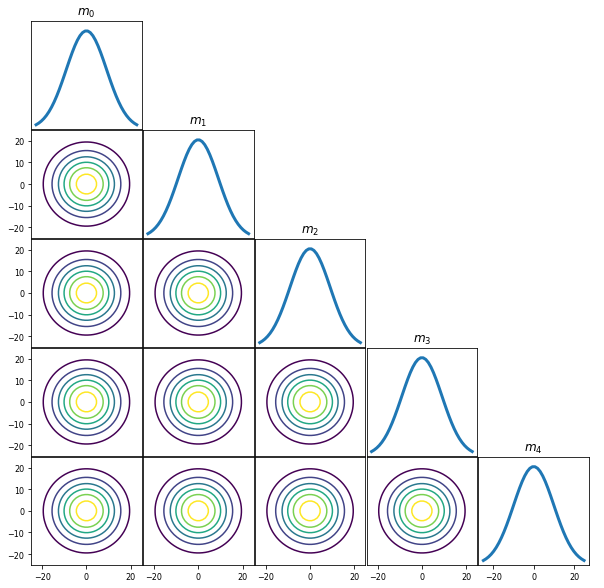

In [6]:
PlotGaussianPDF(priorMean,priorCov)

## Prior predictive

In [7]:
predV = np.ones((numPlot,polyOrder+1))
for p in range(1,polyOrder+1): 
    predV[:,p] = np.power(plotx, p)
    
predMean = np.dot(predV, priorMean)
predCov = np.dot(predV, np.dot(priorCov, predV.T))

predStd = np.sqrt(np.diag(predCov))

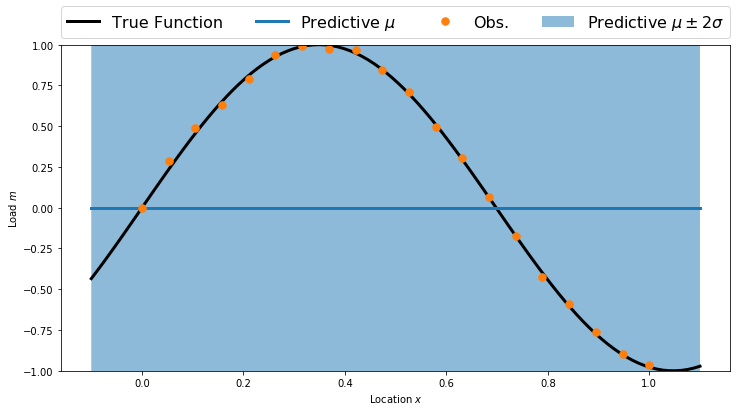

In [8]:
plt.figure(figsize=(12,6))

plt.fill_between(plotx, predMean-2.0*predStd, predMean+2.0*predStd, alpha=0.5, label='Predictive $\mu\pm2\sigma$')
plt.plot(plotx, TrueFunc(plotx), 'k', linewidth=3, label='True Function')
plt.plot(plotx, predMean, linewidth=3, label='Predictive $\mu$')
plt.plot(obsLocs,obsData,'.', markersize=15, label = 'Obs.')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0., fontsize=16)
plt.xlabel('Location $x$')
plt.ylabel('Load $m$')
plt.ylim([-1,1])
plt.show()


## Build the Vandermonde matrix
Construct the Vandermonde matrix as a numpy array

In [9]:
np.random.randn(10,2)

array([[-1.51247377,  1.36670561],
       [ 0.13717071, -0.62691019],
       [ 1.01673708,  0.16869139],
       [-0.18051244,  1.01934698],
       [-0.10696702,  0.44513096],
       [ 0.26322488,  0.68462574],
       [-1.22508793,  0.76851913],
       [-0.58705653, -0.79371788],
       [ 1.91463725,  1.74829198],
       [ 0.11850306, -2.56471913]])

In [10]:
N = 100
prior_samples = np.dot(np.random.randn(N, polyOrder+1), priorCov)
prior_samples.shape

(100, 5)

In [20]:
# TODO: Build the matrix V at the observation locations
V = np.zeros((numObs, polyOrder+1))
for i in range(polyOrder+1):
    V[:,i] = np.power(obsLocs,i)

In [21]:
b = obsData.reshape(-1,1)
predictions = np.zeros((N, numObs))
misfit = np.zeros((N, numObs))
for i in range(0,N):
    predictions[i,:] = np.dot(V,prior_samples[i,:])
    misfit[i,:] = predictions[i,:] - obsData

### Useful Identities
Let $\theta$ denote an arbitrary Gaussian random variable with mean $\mu_\theta$ and covariance $\Sigma_\theta$,
$$
\theta \sim N\left(\mu_\theta, \Sigma_\theta\right).
$$
Then, for a matrix $A$, 
$$
A\theta \sim N\left(A\mu_\theta,\, A\Sigma_\theta A^T\right)
$$
Let $\eta = A\theta + e$, where $e\sim N(0,\Sigma_e)$, then the posterior $p(\theta | \eta)$ is given by
$$
p(\theta | \eta=\bar{\eta}) = N\left(\hat{\mu}, \hat{\Sigma}\right),
$$
where 
$$
\hat{\mu} = \mu_\theta + \Sigma_\theta A^T\left(A\Sigma_\theta A^T + \Sigma_e\right)^{-1}\left(\bar{\eta} - A\mu_\theta\right)
$$
and
$$
\hat{\Sigma} = \Sigma_\theta - \Sigma_\theta A^T\left(A\Sigma_\theta A^T + \Sigma_e\right)^{-1}A\Sigma_\theta
$$

[These notes](https://cs.nyu.edu/~roweis/notes/gaussid.pdf) by Sam Roweis also provide some useful identities.

## Compute the posterior mean and covariance

In [22]:
# TODO: Build the noise covariance
sigmaY = trueNoiseStd**2*np.eye(numObs)

In [23]:
# TODO: Compute the posterior mean and covariance
A = V
ms = obsData - np.dot(A, priorMean)
sigma_At = priorCov@A.T
K = np.linalg.inv(np.dot(A, sigma_At) + sigmaY)
postMean = priorMean + sigma_At@K@ms
postSigma = priorCov - sigma_At@K@A@priorCov

In [24]:
postMean

array([  5.58661559e-03,   4.86410073e+00,  -2.26826438e+00,
        -1.40221361e+01,   1.04757450e+01])

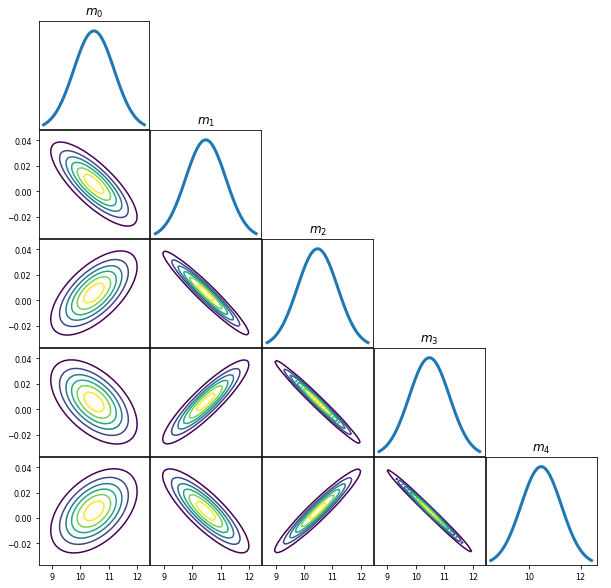

In [25]:
# TODO: Plot 2D marginals of the posterior distribution using the PlotGaussianPDF function
PlotGaussianPDF(postMean,postSigma)

## Construct the posterior predictive

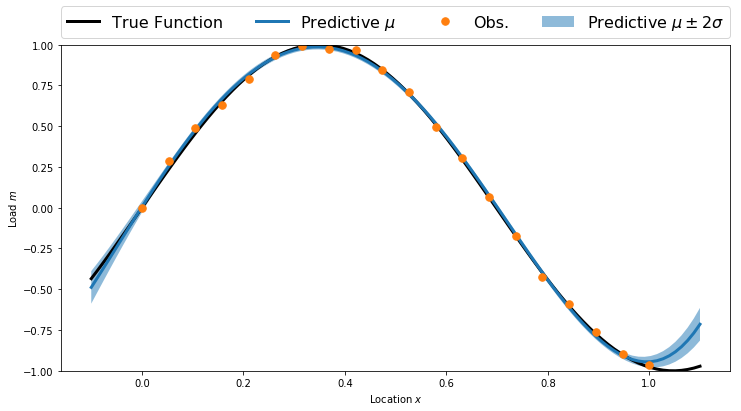

In [28]:
# TODO: Mimic the prior predictive plot with the posterior mean and covariance
predV = np.ones((numPlot,polyOrder+1))
for p in range(1,polyOrder+1): 
    predV[:,p] = np.power(plotx, p)
    
predMean = predV@postMean
predCov = predV@postSigma@predV.T

predStd = np.sqrt(np.diag(predCov))
plt.figure(figsize=(12,6))

plt.fill_between(plotx, predMean-2.0*predStd, predMean+2.0*predStd, alpha=0.5, label='Predictive $\mu\pm2\sigma$')
plt.plot(plotx, TrueFunc(plotx), 'k', linewidth=3, label='True Function')
plt.plot(plotx, predMean, linewidth=3, label='Predictive $\mu$')
plt.plot(obsLocs,obsData,'.', markersize=15, label = 'Obs.')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0., fontsize=16)
plt.xlabel('Location $x$')
plt.ylabel('Load $m$')
plt.ylim([-1,1])
plt.show()